# Higher Order Derivatives

In our package, one of our proposed and implemented extensions were higher order derivatives. That means that for some scalar function $f: \mathbb{R} \to \mathbb{R}$, we are able to compute the higher order derivatives $f^{(n)}$ at any point in the support of $f$.

## Taylor Expansion Error

One of the use-cases for computing higher-order derivatives with automatic differentiation is to evaluate the error of the Taylor expansion around a certain point. Certain functions have very complex higher order derivatives, and calculating the error terms for an expansion would be analytically infeasible. With automatic differentiation, we are able to numerically calculate the higher order derivatives up to floating point error quickly.

In [1]:
import ad
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def taylor_expansion(f, var, n, a, x):
    """Computes the taylor expansion up to the nth derivative, centered around a.
    x is where we wish to evaluate the function.
    @param f: ad.Expression function with only one dependent variable
    @param n: order for taylor expansion. Must be a positive integer.
    @param a: location that the function should be expanded around
    @param x: location that the function should be evaluated at
    
    @returns function result from the Taylor approximation."""
    d = [f.d_n(k, a) for k in range(1, n + 1)]
    terms = [d[k - 1] * (x - a) ** k / np.math.factorial(k) for k in range(1, n + 1)]
    return f.eval({var: a}) + np.array(terms).sum()

### Example

Consider the function

$$f(x) = \cos(x) + x^2 \sin(x + \exp(\log (5 + x) - 3))$$

The analytic form of higher order derivatives of this function are very complex. However, for many applications we will use Taylor expansions to approximate the function, and it would be difficult finding an analytic form of the error. Let's use automatic differentiation.

In [3]:
x = ad.Variable()
f = ad.Cos(x) + (x ** 2) * ad.Sin(x + ad.Exp(ad.Log(5 + x) - 3))

Let's plot the function just to see what it looks like at least.

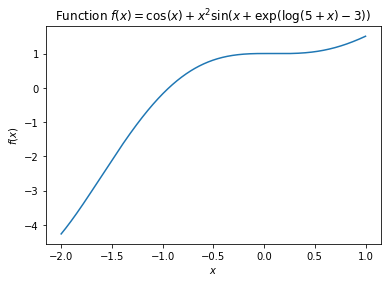

In [19]:
xs = list(np.linspace(-2, 1, 1002))
fxs = [f.eval({x: xval}) for xval in xs]
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r"Function $f(x) = \cos(x) + x^2 \sin(x + \exp(\log (5 + x) - 3))$")
plt.plot(xs, fxs)
plt.show()

Now, using our library, we can find the Taylor expansion for different order of approximations visually, instead of bashing through the analytic form of the higher order derivatives. This is useful when we want to check whether or not our Taylor expansions are good for approximation.

In [20]:
APPROX_ORDERS = [1, 4, 8, 12]
APPROX_CENTER = 0
order_vals = []
for order in APPROX_ORDERS:
    fxs = []
    for xval in xs:
        val = 0
        try:
            val = taylor_expansion(f, x, order, APPROX_CENTER, xval)
        except ValueError:
            pass
        fxs.append(val)
    order_vals.append(fxs)

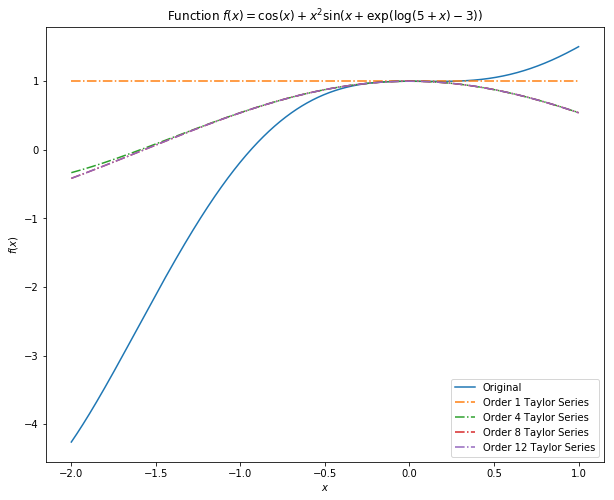

In [21]:
plt.figure(figsize=(10, 8))
fxs = [f.eval({x: xval}) for xval in xs]
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r"Function $f(x) = \cos(x) + x^2 \sin(x + \exp(\log (5 + x) - 3))$")
plt.plot(xs, fxs)

for fxorder in order_vals:
    plt.plot(xs, fxorder, linestyle='-.')
plt.legend(['Original'] + ["Order {} Taylor Series".format(a) for a in APPROX_ORDERS])
# Now plot the higher order approximations
plt.show()

Now let's see what the Taylor expansion looks like around another point, one that doesn't look like a local extrema. We can see whether or not our Taylor expansion does better or worse just by looking at it. It also allows us to see the error in our Taylor expansion by how far you go from the approximation point.

In [22]:
APPROX_ORDERS = [1, 2, 4, 6]
APPROX_CENTER = -1.5
order_vals = []
for order in APPROX_ORDERS:
    fxs = []
    for xval in xs:
        val = 0
        try:
            val = taylor_expansion(f, x, order, APPROX_CENTER, xval)
        except ValueError:
            pass
        fxs.append(val)
    order_vals.append(fxs)

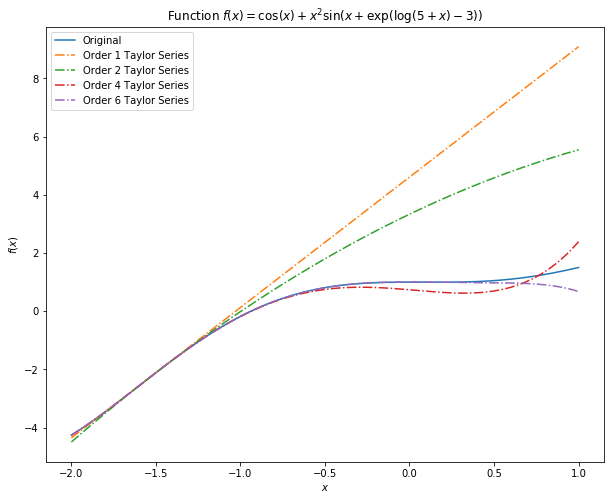

In [23]:
plt.figure(figsize=(10, 8))
xs = list(np.linspace(-2, 1, 1002))
fxs = [f.eval({x: xval}) for xval in xs]
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r"Function $f(x) = \cos(x) + x^2 \sin(x + \exp(\log (5 + x) - 3))$")
plt.plot(xs, fxs)

for fxorder in order_vals:
    plt.plot(xs, fxorder, linestyle='-.')
plt.legend(['Original'] + ["Order {} Taylor Series".format(a) for a in APPROX_ORDERS])
# Now plot the higher order approximations
plt.show()